 <div align=center>
    <font color=blue size=6>
    <br />
Practical Assignment 
    <br/>
    </font>
    </div>

In [79]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [80]:
def plot(temp):
    fig, axes = plt.subplots(4,2, figsize=(20,20))
    axes = axes.flatten()
    sns.scatterplot(x=temp['LSTAT'], y=temp['predicted_target'], ax = axes[0])
    sns.scatterplot(x=temp['LSTAT'], y=temp['MEDV'], ax = axes[1])
    sns.scatterplot(x=temp['DIS'], y=temp['predicted_target'], ax = axes[2])
    sns.scatterplot(x=temp['DIS'], y=temp['MEDV'], ax = axes[3])
    sns.scatterplot(x=temp['CRIM'], y=temp['predicted_target'], ax = axes[4])
    sns.scatterplot(x=temp['CRIM'], y=temp['MEDV'], ax = axes[5])
#both plots in one plot
    sns.scatterplot(x=temp['LSTAT'], y=temp['predicted_target'], ax = axes[6] , label='predicted_target' )
    sns.scatterplot(x=temp['LSTAT'], y=temp['MEDV'], ax = axes[6] , label='MEDV')
    sns.scatterplot(x=temp['DIS'], y=temp['predicted_target'], ax = axes[7], label='predicted_target')
    sns.scatterplot(x=temp['DIS'], y=temp['MEDV'], ax = axes[7] , label='MEDV')

In [121]:
#load Boston house prices dataset
boston_dataset = load_boston()
#keys
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [82]:
#convert boston_dataset to boston_dataframe
boston_dataframe = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_dataframe['MEDV'] = boston_dataset.target
boston_dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<div dir = "rtl">
    CRIM: نرخ سرانه جنایت بر اساس شهر
<br/>
    ZN: درصد زمین مسکونی پهنه بندی شده برای زمین های بیش از 25000 فوت مربع
<br/>
    INDUS: درصد هکتارهای تجاری غیر خرده فروشی در هر شهر
<br/>
    CHAS: متغیر ساختگی رودخانه چارلز (= 1 اگر مسیر به رودخانه محدود می شود؛ 0 در غیر این صورت)
<br/>
    NOX: غلظت اکسید نیتریک (قسمت در هر 10 میلیون)
<br/>
    RM: میانگین تعداد اتاق در هر خانه
<br/>
    AGE: درصد واحدهای تحت اشغال ساخته شده قبل از سال 1940
<br/>
    DIS: فواصل وزنی تا پنج مرکز استخدامی بوستون
<br/>
    RAD: شاخص دسترسی به بزرگراه های شعاعی
<br/>
    TAX: نرخ مالیات بر دارایی با ارزش کامل به ازای هر 10000 دلار
<br/>
    PTRATIO: درصد دانش آموز به معلم بر اساس شهر
<br/>
    B:  درصد [افراد آمریکایی آفریقایی تبار] بر اساس شهر
<br/>
    LSTAT: درصد جمعیت سطح پایین
<br/>
    MEDV: میانگین ارزش خانه‌های تحت اشغال در 1000 دلار

 <div align=center>
    <font color=green size=5>
    <br />
Question 1
    <br/>
    </font>
    </div>

In [83]:
#count of missing parts
boston_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<div dir="rtl">
    خوشبختانه داده ی گمشده ای نداریم:)
</div>  

In [84]:
#split the dataset into train set (80% of the data) and test set (20% of the data).
mask = np.random.rand(len(boston_dataframe)) <= 0.8
training = boston_dataframe[mask]
testing = boston_dataframe[~mask]
print("count of training dataset's rows",len(training))
print("count of testing dataset's rows",len(testing))

count of training dataset's rows 418
count of testing dataset's rows 88


 <div align=center>
    <font color=green size=5>
    <br />
Question 2
    <br/>
    </font>
    </div>

<AxesSubplot:>

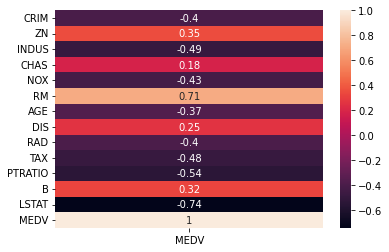

In [85]:
#heatmap plot
sns.heatmap(training.corr()['MEDV'].to_frame(),annot = True)

<div dir="rtl">
   با استفاده از نمودار heatmap بالاتر درمیابیم که همبستگی MEDV با RM,LSTAT بیشتر از بقیه ی featursها هست و کمترین مقدار همبستگی را نیز با DIS,CHAS دارد
.تعاریف این feature ها در زیر آمده است:
</div>  
<div>
DIS: Weighted distances to five Boston employment centers
    <br/>
RM: Average number of rooms per dwelling
    <br/>
MEDV: Median value of owner-occupied homes in 1000s
    <br/>
    LSTAT: Percentage of lower status of the population
    <br/>
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
</div>

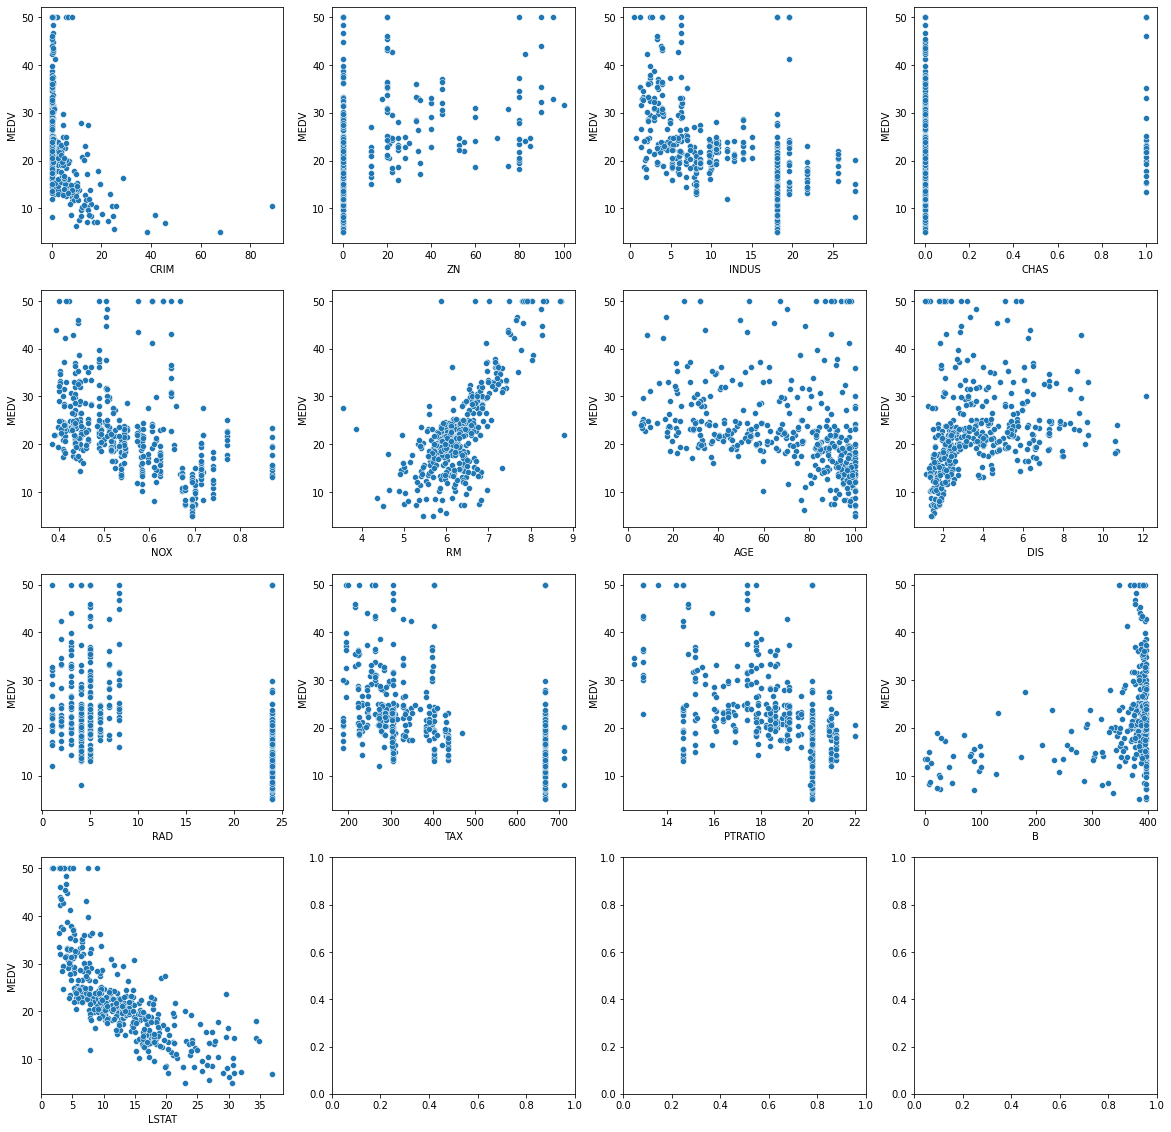

In [86]:
#scatter plot MEDV versus other features
fig, axes = plt.subplots(4,4, figsize=(20,20))
#find alternative way
axes = axes.flatten()
for i in range(13):
    sns.scatterplot(x=training[training.columns[i]], y=training['MEDV'], ax = axes[i])

<div dir = "rtl">
    همانطور که انتظار میرفت نمودار MEDV برحسب RM یک نمودار تقریبا خطی با شیب منفی شد که نشان میدهد این دو feature باهم همبسته اند.هر چه قدرمیانگین تعداد اتاق هر خانه بیشتر باشد قیمت خانه ها نیز بیشتر خواهد بود.
    <br/>
    از طرفی اگر به نمودار MEDV برحسب LSTAT توجه کنید درمیابید که تقریبا رابطه ی خطی با شیب منفی دارند به این معنی که هرچه قدر شرایط زندگی جمعیت ساکن بدتر باشد قیمت خانه ها کمتر خواهد بود.(هرچه قدر درصد افراد با شرایط زندگی پایین کمتر باشد قیمت خانه ها بیشتر است.) 
<br/>
    بقیه ی نمودارها به اندازه ی این نمودارها رابطه ی بین MEDV و آن feature را directly نشان نمیدهند(به خاطر همبستگی کمترشان) و میتوانیم برای دریافتن از مقدار همبستگی هایشان به صورت دقیق از heatmap بخش قبل استفاده کنیم.
    <div/>    

 <div align=center>
    <font color=green size=5>
    <br />
Question 3
    <br/>
    </font>
    </div>

In [87]:
#calculate Φ 
# x =[x1 x2 ... x13]
# y = w0 + w1*x1 + w2*x2 + ... +w13*x13
# Φ = [1 X]
values = [1] * len(training)
basis_matrix = training.drop(columns=['MEDV'])
basis_matrix.insert(0,"useless",values)
basis_matrix.head()

,useless,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,1,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,1,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [88]:
#calculate weights parameters
#w_ML = (Φ's pseudo inverse).t 
psuedo_inverse = np.linalg.pinv(basis_matrix)
w_ml= np.dot(psuedo_inverse,training['MEDV'])
print("optimal weight parameters:",w_ml)

optimal weight parameters: [ 3.46083679e+01 -1.04293130e-01  3.44761508e-02  1.93462698e-02
  3.77016241e+00 -1.70400624e+01  4.18957565e+00  1.93139836e-04
 -1.28688120e+00  2.40144824e-01 -1.11287281e-02 -1.01220574e+00
  7.18610444e-03 -4.88433256e-01]


In [89]:
#Y = Φ.W_ML
predicted_values = np.dot(basis_matrix,w_ml)

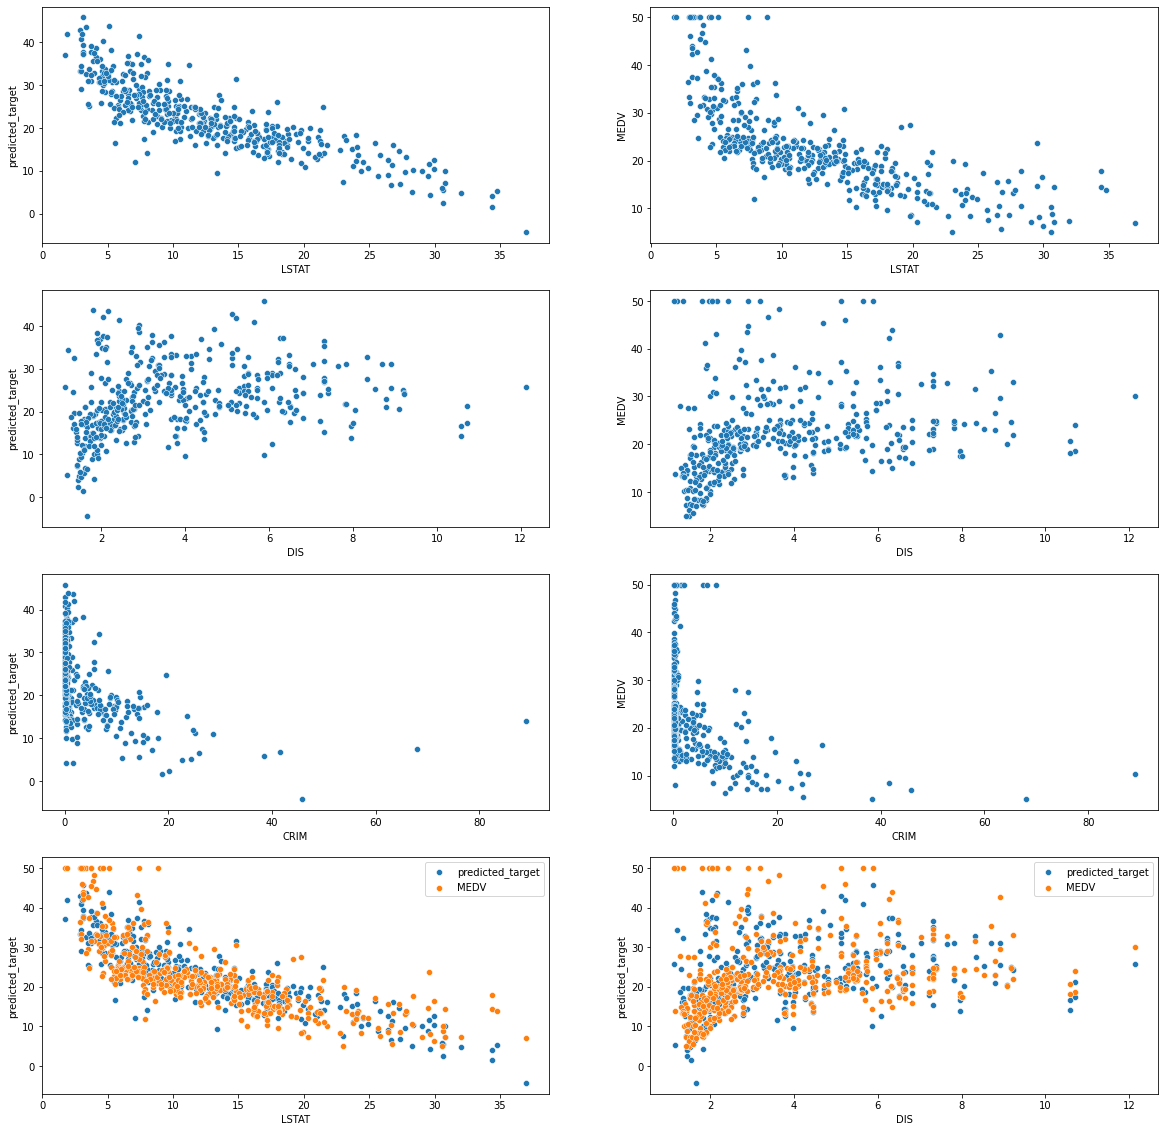

In [90]:
# the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’
temp = training.copy()
temp['predicted_target'] = predicted_values
plot(temp)

<div dir="rtl">
    باتوجه به اینکه linear basis function استفاده شد به نظر نمیامد اینچنین با تقریب خوبی نتایج به دست آمده برای مقدار MEDV به مقادیر واقعی اش نزدیک باشد ولی همانطور که در نمودارهای بالا مشاهده میشود نتایج بسیار به هم نزدیکند.
<div/>

 <div align=center>
    <font color=green size=5>
    <br />
Question 4
    <br/>
    </font>
    </div>

In [91]:
#second-order with one predictor variable
#y = w0 + w11*x1 +w12*x1^2 + ....+ wn1*xn +wn2*xn^2  
basis_matrix_2nd = training.drop(columns=['MEDV'])
basis_matrix_2nd = pd.concat([basis_matrix_2nd, basis_matrix_2nd**2], axis=1, join = 'outer')
basis_matrix_2nd.insert(0,"useless",values)
basis_matrix_2nd.head()

,useless,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,155732.8369,8.6436
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,157529.6100,28.4089
5,1,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,...,0.0,0.209764,41.344900,3445.69,36.750269,9.0,49284.0,349.69,155330.5744,27.1441
6,1,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,...,0.0,0.274576,36.144144,4435.56,30.919160,25.0,96721.0,231.04,156499.3600,154.5049
7,1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,...,0.0,0.274576,38.093584,9235.21,35.408450,25.0,96721.0,231.04,157529.6100,366.7225


In [92]:
#optimal weight parameters
#w_ML = (Φ's pseudo inverse).t 
psuedo_inverse_2nd = np.linalg.pinv(basis_matrix_2nd)
w_ml_2= np.dot(psuedo_inverse_2nd,training['MEDV'])
print("optimal weight parameters:",w_ml_2)

optimal weight parameters: [ 1.46987039e+02 -3.60695692e-01 -5.98041132e-02 -3.36042238e-01
  1.78855917e+00 -7.10044802e+00 -1.82957947e+01 -2.55682771e-02
 -2.08854451e+00  6.87952845e-01 -1.98070675e-02 -4.84158712e+00
  3.01028573e-02 -1.27064397e+00  2.57363424e-03  6.56195232e-04
  1.36193527e-02  1.78855917e+00 -1.15733349e+01  1.69145074e+00
  1.73065439e-04  9.93900181e-02 -1.28128093e-02  9.32703969e-06
  1.12909829e-01 -5.46155274e-05  2.30290653e-02]


In [93]:
#Y = Φ.w_ML
predicted_values_2 = np.dot(basis_matrix_2nd,w_ml_2)

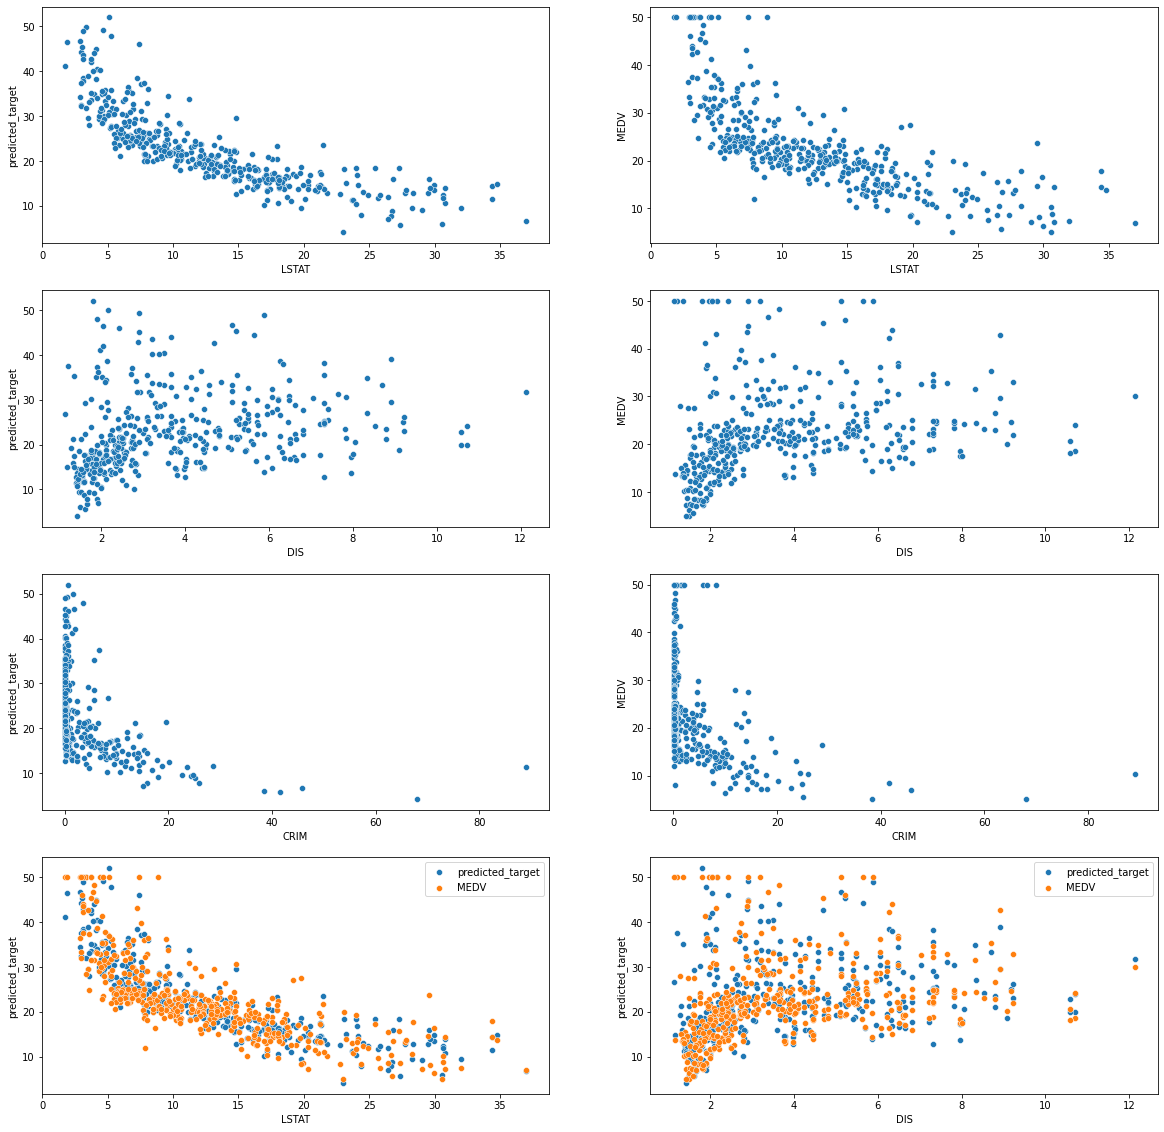

In [94]:
# the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’
temp['predicted_target'] = predicted_values_2
plot(temp)

<div dir="rtl">
    باتوجه به اینکه در این بخش مرتبه دو feature ها نیز تاثیر داده شد، مقادیر به دست آمده برای MEDV بیشتر از بخش اول به مقادیر حقیقی شان نزدیک شدند.
    <div/>

 <div align=center>
    <font color=green size=5>
    <br />
Question 5
    <br/>
    </font>
    </div>

In [95]:
#find μ_j randomly
sample_x = training.sample(n = 10)
#calculate Φ
basis_matrix_3 = training.apply(lambda row: pd.Series([np.exp(-np.linalg.norm((np.subtract(row,sample_x.iloc[i]))**2,2)/2) for i in range(10)]), axis = 1)
basis_matrix_3.insert(0,"useless",values)
basis_matrix_3.head()

,useless,0,1,2,3,4,5,6,7,8,9
3,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
4,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
5,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
6,1,0.0,8.615231e-291,2.164954e-100,0.0,0.0,1.518577e-41,4.768743e-252,0.0,0.0,0.0
7,1,0.0,3.590062e-254,1.562794e-45,0.0,0.0,2.889658e-143,0.000000e+00,0.0,0.0,0.0


In [96]:
#optimal weight parameters
#w_ML = (Φ's pseudo inverse).t 
psuedo_inverse_3rd = np.linalg.pinv(basis_matrix_3)
w_ml_3= np.dot(psuedo_inverse_3rd,training['MEDV'])
print("optimal weight parameters:",w_ml_3)

optimal weight parameters: [ 22.57205829 -14.47205829  -0.8721784    1.22792113   0.62794171
  -0.57205829   8.92794171   6.82794171   5.92814577   0.02794171
  -1.97205829]


In [97]:
#Y = Φ.w_ML
predicted_values_3 = np.dot(basis_matrix_3,w_ml_3)

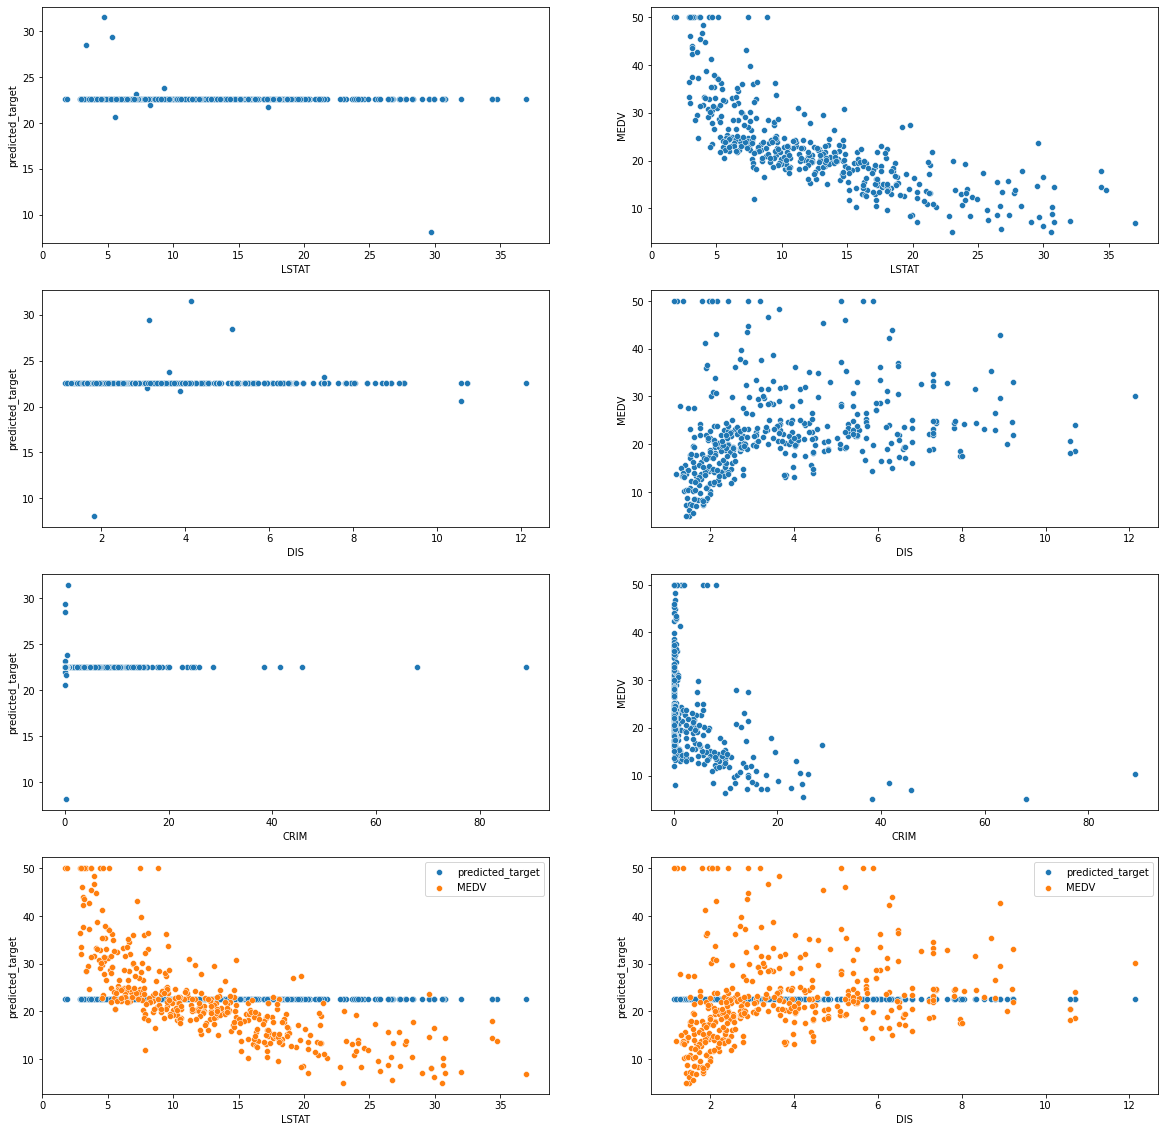

In [98]:
# the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’
temp['predicted_target'] = predicted_values_3
plot(temp)

<div dir="rtl">
   من انتظار داشتم با این basis function نتیجه ی بهتری به دست آوریم ولی به خاطر مقدار بسیار زیاد x-μ حاصل exp برابرصفر میشود.
  <br/>
    توجه : در سوال در توان basis function منفی نوشته نشده بود و فکر میکنم جاانداخته شده بود و من محاسباتم را با درنظر گرفتن منفی در توان e انجام دادم
    <div/>

 <div align=center>
    <font color=green size=5>
    <br />
Question 6
    <br/>
    </font>
    </div>

In [99]:
#testing dataset's Φ
#first basis function
test_basis_matrix = testing.drop(columns=['MEDV'])
test_basis_matrix.insert(0,"useless",1)
#second basis function
test_basis_matrix_2nd = testing.drop(columns=['MEDV'])
test_basis_matrix_2nd = pd.concat([test_basis_matrix_2nd, test_basis_matrix_2nd**2], axis=1, join = 'outer')
test_basis_matrix_2nd.insert(0,"useless",1)
#third basis function
test_basis_matrix_3rd = testing.apply(lambda row: pd.Series([np.exp(-np.linalg.norm((np.subtract(row,sample_x.iloc[i]))**2,2)/2) for i in range(10)]), axis = 1)
test_basis_matrix_3rd.insert(0,"useless",1)

In [100]:
#test's predicted values
#with basis function1
test_predicted_values1 = np.dot(test_basis_matrix,w_ml)
#with basis function2
test_predicted_values2 = np.dot(test_basis_matrix_2nd,w_ml_2)
#with basis function3
test_predicted_values3 = np.dot(test_basis_matrix_3rd,w_ml_3)

In [101]:
#the train and test MSE loss
test_target_values = testing['MEDV']
train_target_values = training['MEDV']
def calculate_loss(test,predicted):
    if test:
        return (np.linalg.norm(test_target_values-predicted,2)**2)/len(testing)
    else:
        return (np.linalg.norm(train_target_values-predicted,2)**2)/len(training)
print("training data Loss (approach 1):",calculate_loss(False,predicted_values))
print("training data Loss (approach 2):",calculate_loss(False,predicted_values_2))
print("training data Loss (approach 3):",calculate_loss(False,predicted_values_3))
print("\ntesting data Loss (approach 1):",calculate_loss(True,test_predicted_values1))
print("testing data Loss (approach 2):",calculate_loss(True,test_predicted_values2))
print("testing data Loss (approach 3):",calculate_loss(True,test_predicted_values3))

training data Loss (approach 1): 20.197949559757557
training data Loss (approach 2): 12.794690645129924
training data Loss (approach 3): 83.33047581873018

testing data Loss (approach 1): 31.805486755992323
testing data Loss (approach 2): 23.056749964380824
testing data Loss (approach 3): 85.30845533433309


<div dir="rtl">
    باتوجه به داده های بالا مقدار خطای MSE با basis function دوم که second order بود کمتر از دو basis function دیگر است.
    <div/>

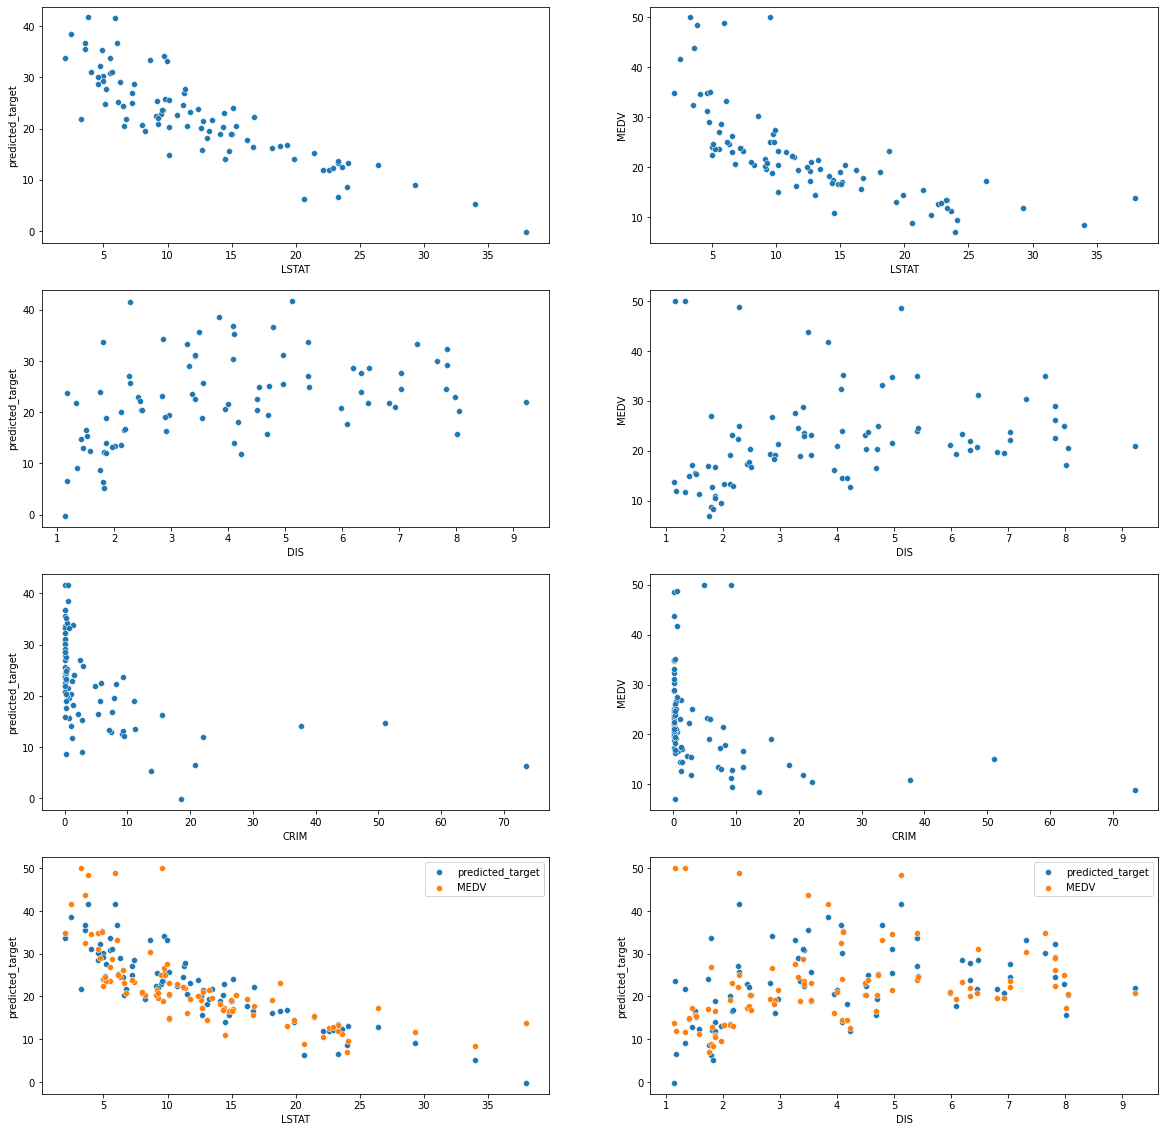

In [102]:
#the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’ for testing data (using linear bias function)
temp = testing.copy()
temp['predicted_target'] = test_predicted_values1
plot(temp)

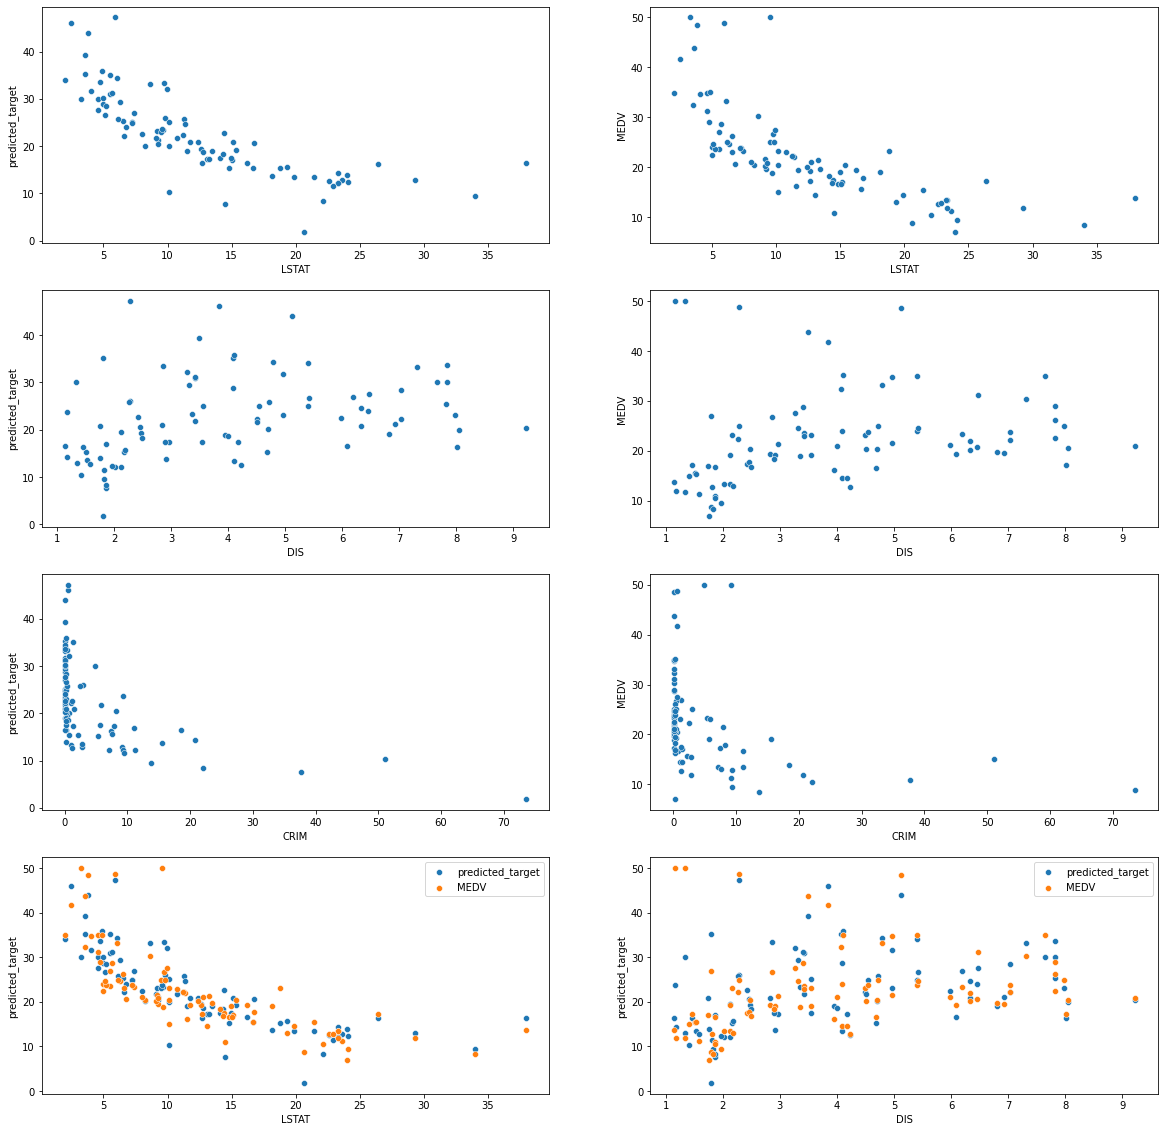

In [103]:
#the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’ for testing data (using 2nd-order bias function with one predictor variable)
temp['predicted_target'] = test_predicted_values2
plot(temp)

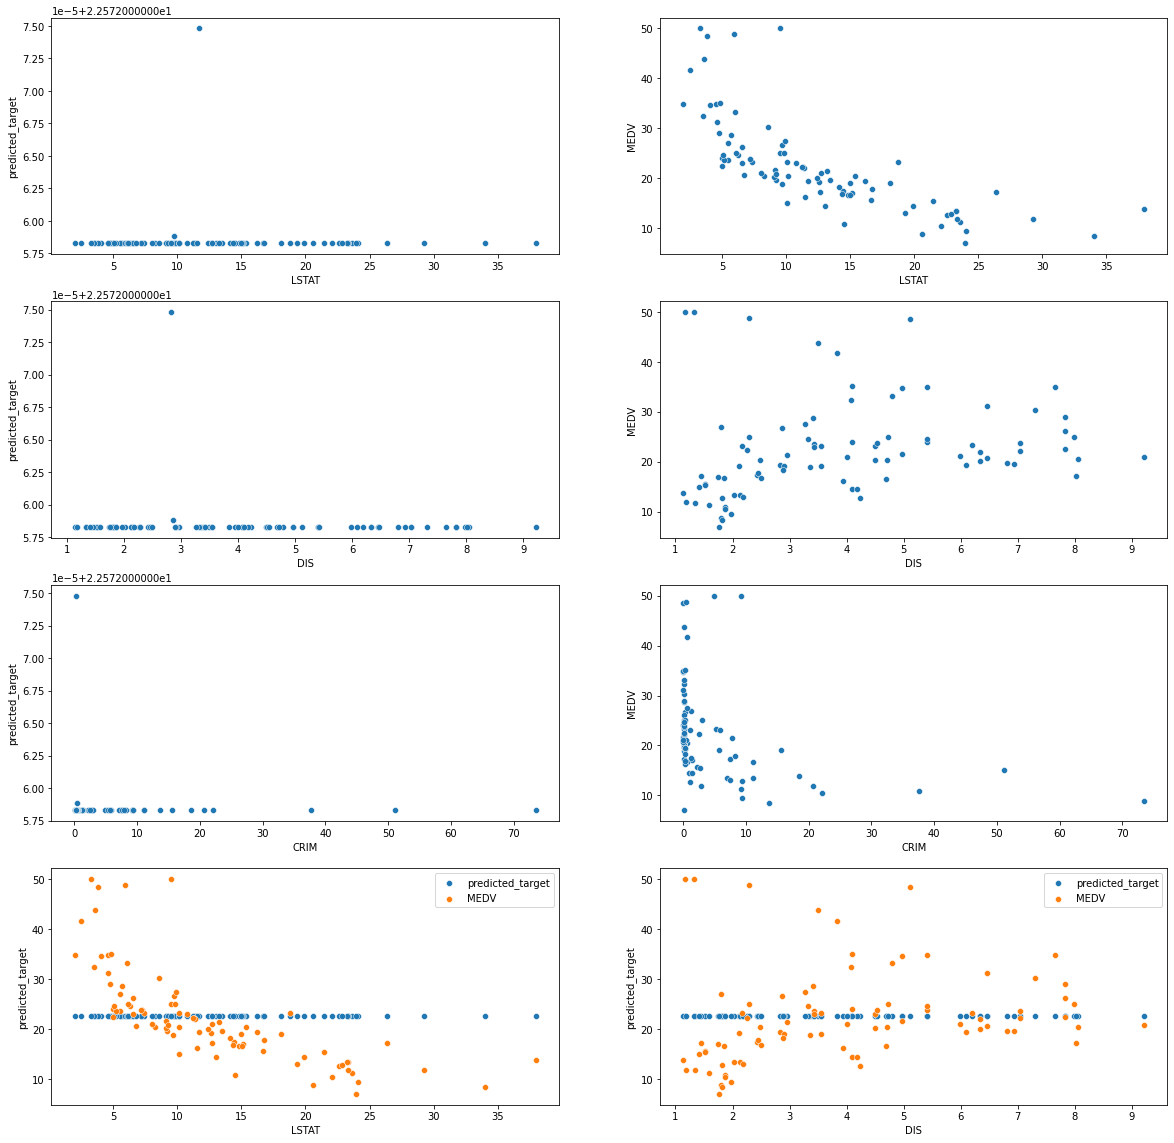

In [104]:
#the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’ for testing data (using gaussian bias function)
temp['predicted_target'] = test_predicted_values3
plot(temp)

<div dir="rtl">
همانطور که از نمودارها و مقادیر خطای به دست آمده مشخص است basis function دوم (second order with one predictor variable) عملکرد بهتری برای این مسیله 
    داشته است و بهتر است 
<div/>

 <div align=center>
    <font color=green size=5>
    <br />
Appendix
    <br/>
    </font>
    </div>

<div dir="rtl">
    باتوجه به آنکه نتیجه basis function سوم غیرمنتظره بود احتمال میدهم که شاید با نرمالایز کردن feature ها یا افزایش مقدار s نتیجه بهبود یابد.
    <br/>
    مثلا با s=150 داریم:
    <div/>

In [115]:
# for training Data
#find μ_j randomly
A_sample_x = training.sample(n = 10)
#calculate Φ
A_basis_matrix_3 = training.apply(lambda row: pd.Series([np.exp(-np.linalg.norm((np.subtract(row,sample_x.iloc[i]))**2,2)/(2*(150**2))) for i in range(10)]), axis = 1)
A_basis_matrix_3.insert(0,"useless",values)
A_basis_matrix_3.head()

,useless,0,1,2,3,4,5,6,7,8,9
3,1,0.004913,0.920731,0.857043,0.880046,0.947239,0.851090,0.885376,0.866853,0.382268,0.730933
4,1,0.004913,0.928071,0.859472,0.879625,0.949219,0.851546,0.885062,0.866287,0.382140,0.730316
5,1,0.004915,0.930767,0.860251,0.879184,0.949835,0.851633,0.884655,0.865666,0.382045,0.729872
6,1,0.028493,0.970752,0.989852,0.955383,0.963155,0.995831,0.974608,0.865895,0.726526,0.892652
7,1,0.028490,0.974397,0.995425,0.904686,0.961576,0.985519,0.915288,0.840151,0.708968,0.847178


In [116]:
#optimal weight parameters
#w_ML = (Φ's pseudo inverse).t 
A_psuedo_inverse_3rd = np.linalg.pinv(A_basis_matrix_3)
A_w_ml_3= np.dot(A_psuedo_inverse_3rd,training['MEDV'])
print("optimal weight parameters:",A_w_ml_3)

optimal weight parameters: [  10.9938396    12.51722292  316.91576583  -33.50723034  -39.97693548
 -396.38785168  -53.96917383  177.46839774   56.53802699  -29.17941624
   17.74387869]


In [117]:
#Y = Φ.w_ML
A_predicted_values_3 = np.dot(A_basis_matrix_3,A_w_ml_3)

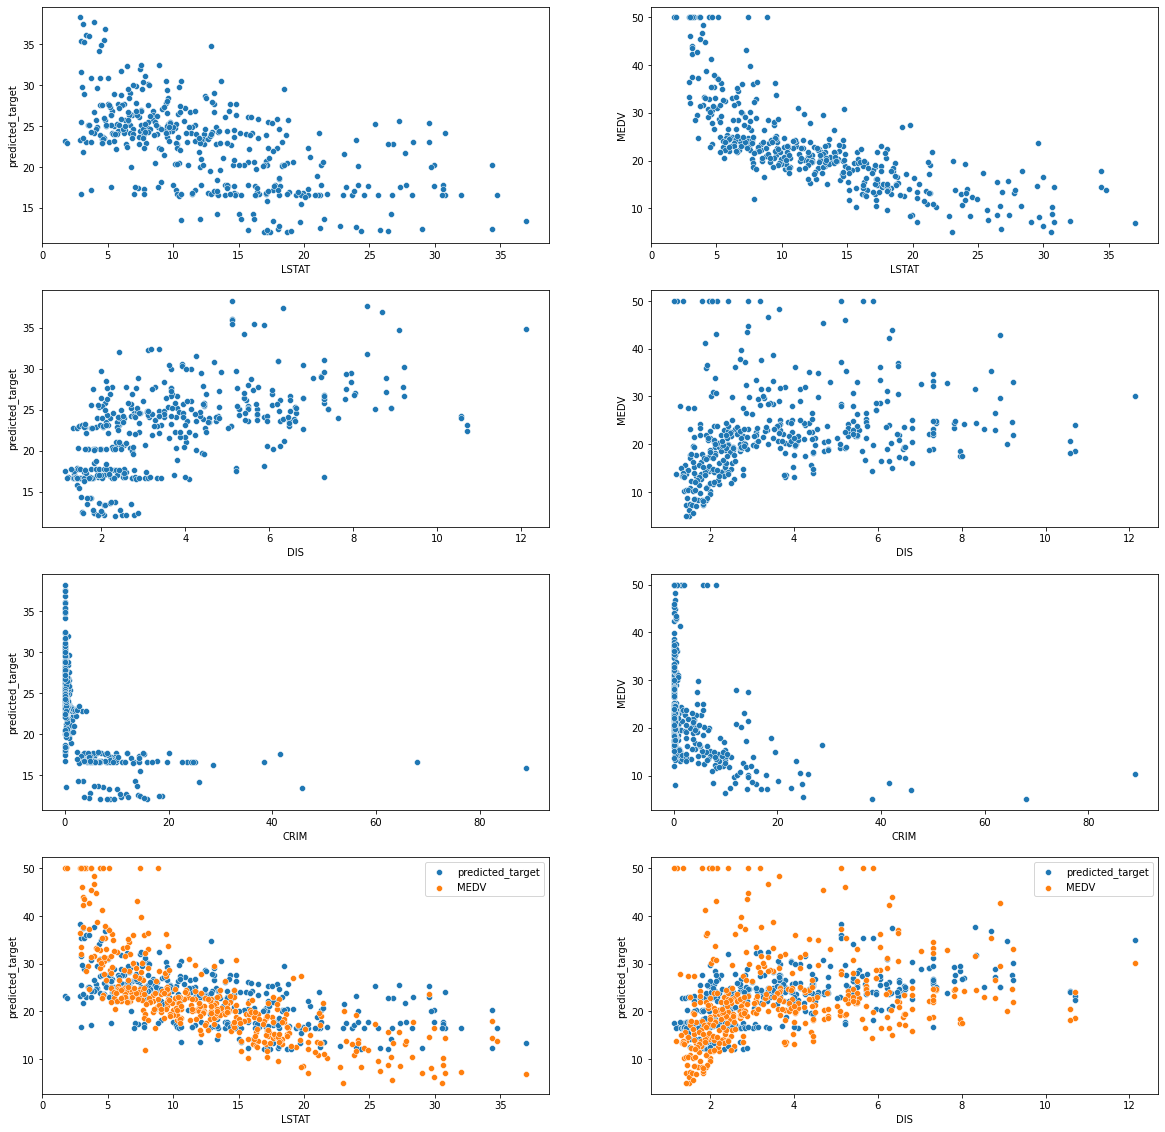

In [118]:
# the target value and the predicted value based on ‘LSTAT’, ‘DIS’, ‘CRIM’
temp = training.copy()
temp['predicted_target'] = A_predicted_values_3
plot(temp)

In [119]:
print("training data Loss (approach 3 with s = 150):",calculate_loss(False,A_predicted_values_3))

training data Loss (approach 3 with s = 150): 57.05905925894857
